In [1]:
!pip install mglearn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.


# 1. K-means clustering
## A. 인위적으로 생성한 데이터셋
### 0) Import libraries

In [2]:
import mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 1) 데이터 생성과 클러스터링 시각화

In [3]:
X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
print("클러스터 레이블: \n{}".format(kmeans.labels_))

클러스터 레이블: 
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


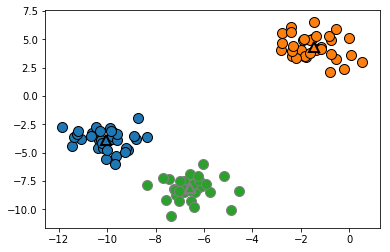

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0,1,2],
    markers='^', markeredgewidth=2
)

## 2) K에 따른 클러스터링 결과

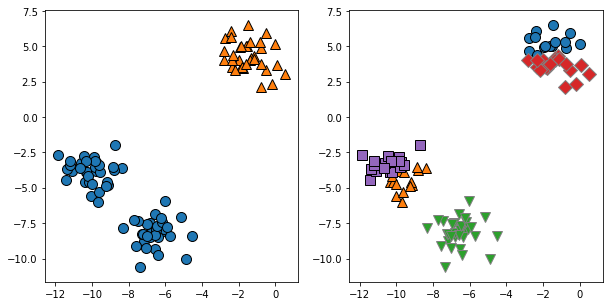

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

## 3) 임의의 형태의(nonspherical) 클러스터를 구분하지 못하는 K-means clustering 알고리즘

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
           edgecolors='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# B. wine 성분에 따른 품종 클러스터링

In [7]:
import numpy as np
import pandas as pd

## 1) wine.csv 데이터 살펴보기

In [8]:
wine = pd.read_csv("wine.csv")
wine
#wine.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [9]:
print(wine.shape)
print(wine.columns)

(178, 14)
Index([u'Class', u'Alcohol', u'Malic acid', u'Ash', u'Alcalinity of ash',
       u'Magnesium', u'Total phenols', u'Flavanoids', u'Nonflavanoid phenols',
       u'Proanthocyanins', u'Color intensity', u'Hue',
       u'OD280/OD315 of diluted wines', u'Proline'],
      dtype='object')


## 클러스터링 수행(두 개 속성만으로 클러스터링 해보기)

In [10]:
wine2 = wine[["Class", "Alcohol", "Malic acid"]]
wine2

,Class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


In [11]:
wine2 = wine[["Class", "Alcohol", "Malic acid"]]
X = np.c_[wine2['Alcohol'], wine2['Malic acid']]
y = wine2['Class']
m = len(wine2)

X = (np.array(X)).reshape(m,2)
y = (np.array(y)).reshape(m,1)
print(X.shape, y.shape)

((178, 2), (178, 1))


## 3) feature normalization

In [12]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mu) / std
    
    return X_norm, mu, std

In [13]:
X, mu, std = featureNormalize(X)
print(X.shape)

(178, 2)


## 4) 클러스터링 수행

Text(0,0.5,'Malic acid')

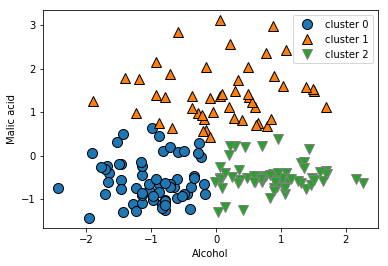

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel(wine2.columns[1])
plt.ylabel(wine2.columns[2])

## 5) 정답 레이블과 비교

[[ 1  7 51]
 [54 10  7]
 [ 8 32  8]]


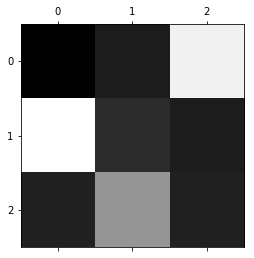

In [15]:
# print(kmeans.labels_)
# print(y)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y.reshape(-1), kmeans.labels_+1)

print(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

In [16]:
print(y.reshape(-1).shape)
print(kmeans.labels_.shape)

(178,)
(178,)


In [17]:
print(kmeans.labels_+1)
print(y.reshape(-1))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 3 2 3 2 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 1 1 1 3 1 3 1 1 3 3 3
 1 1 3 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 2 2 2 3 2 2 2 2 2 2
 2 2 2 1 3 2 1 2 2 2 3 3 2 2 2 2 3 2 2 2 3 2 1 1 3 2 2 2 3 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [18]:
from sklearn.metrics.cluster import silhouette_score
clusters = kmeans.fit_predict(X)
silhouette_score(X, clusters)

0.484095893654603

## 6) 클러스터링 수행(모든 속성으로 클러스터링 해보기)

In [19]:
# print(wine[wine.columns[1: ]])
wine2 = wine[wine.columns[1: ]]

X = np.c_[wine2[:]]
y = wine['Class']
m = len(wine2)

n = wine2.shape[1]
X = (np.array(X)).reshape(m,n)
y = (np.array(y)).reshape(m,1)
print(X.shape, y.shape)

((178, 13), (178, 1))


# 2. Agglomerative clustering
## 0) import libraries

In [20]:
import mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

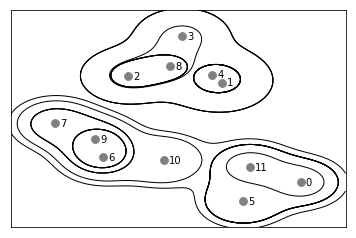

In [21]:
mglearn.plots.plot_agglomerative()

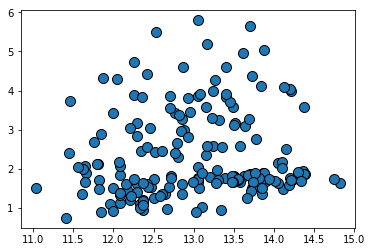

In [22]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], markers='o')

{'color_list': ['g', 'g', 'g', 'g', 'r', 'r', 'c', 'c', 'c', 'b', 'b'],
 'dcoord': [[0.0, 0.3320945047164902, 0.3320945047164902, 0.0],
  [0.0, 0.9268322277319817, 0.9268322277319817, 0.0],
  [0.0, 1.6004181164464242, 1.6004181164464242, 0.9268322277319817],
  [0.3320945047164902,
   2.078157949404743,
   2.078157949404743,
   1.6004181164464242],
  [0.0, 1.1803786988620995, 1.1803786988620995, 0.0],
  [0.0, 1.3031157463723073, 1.3031157463723073, 1.1803786988620995],
  [0.0, 0.6458019336639491, 0.6458019336639491, 0.0],
  [0.0, 1.4440338959892802, 1.4440338959892802, 0.6458019336639491],
  [0.0, 2.1598188624745154, 2.1598188624745154, 1.4440338959892802],
  [1.3031157463723073,
   6.550248535823649,
   6.550248535823649,
   2.1598188624745154],
  [2.078157949404743,
   7.924468768378964,
   7.924468768378964,
   6.550248535823649]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.

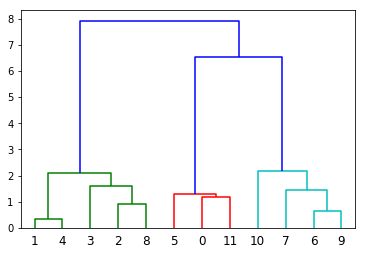

In [23]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

linkage_arr = ward(X)
dendrogram(linkage_arr)

Text(0,0.5,'distance between clusters')

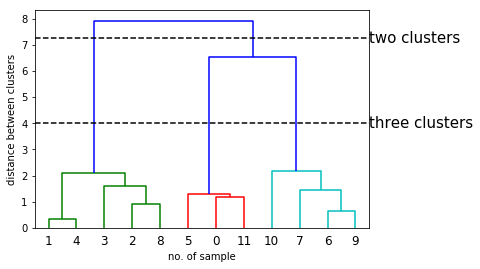

In [24]:
dendrogram(linkage_arr)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size':15})
plt.xlabel("no. of sample")
plt.ylabel("distance between clusters")

# 3. DBSCAN
## 0) Import libraries

In [25]:
from sklearn.cluster import DBSCAN

## 1) 임의의 구형 데이터셋에 대한 DBSCAN

In [26]:
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블: \n{}".format(clusters))

클러스터 레이블: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


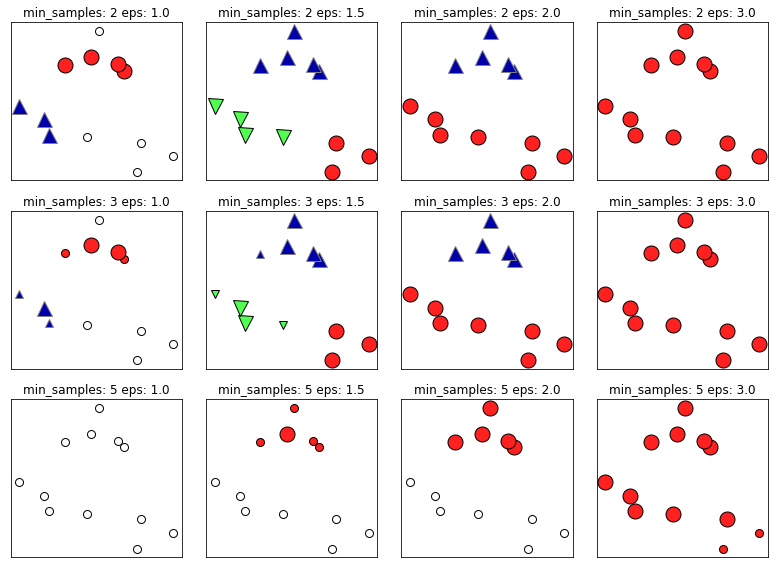

In [27]:
mglearn.plots.plot_dbscan()

## 2) 임의의 형태(nonspherical) 데이터에 대한 DBSCAN

Text(0,0.5,'feature 1')

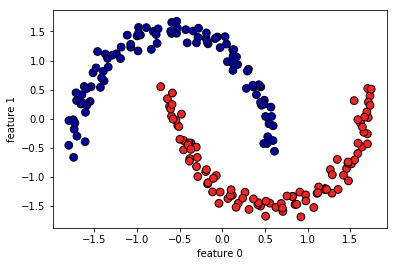

In [28]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

## 3) 임의의 형태(nonspherical) 데이터에 대한 {K-means, Agglomerative, DBSCAN} 클러스터링 알고리즘 비교

In [29]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

In [30]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

cluster_algos = [KMeans(n_clusters=2),
                AgglomerativeClustering(n_clusters=2),
                DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

## 3)-1 타겟값(y) 이용한 평가

## ex.ARI(adjusted rand index), NMI(normalized mutual information)

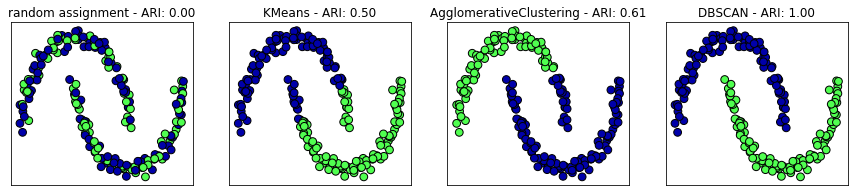

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                       subplot_kw={'xticks': (), 'yticks': ()})

axes[0].scatter(X[:, 0], X[:, 1], c=random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assignment - ARI: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))

for ax, algo in zip(axes[1:], cluster_algos):
    clusters = algo.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(
        algo.__class__.__name__,
        adjusted_rand_score(y, clusters)))

## 3)-2 타겟값 없이 평가
## ex. Dunn index, silhouette

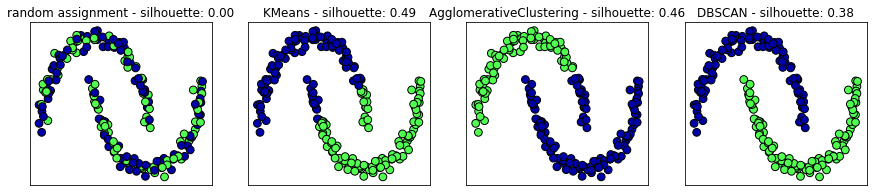

In [32]:
from sklearn.metrics.cluster import silhouette_score
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                       subplot_kw={'xticks': (), 'yticks': ()})

axes[0].scatter(X[:, 0], X[:, 1], c=random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assignment - silhouette: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))

for ax, algo in zip(axes[1:], cluster_algos):
    clusters = algo.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - silhouette: {:.2f}".format(
        algo.__class__.__name__,
        silhouette_score(X, clusters)))